<a href="https://colab.research.google.com/github/sathyadithyarithi/ITI103_myClasswork/blob/main/Copy_of_rudehousing_22June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1
##Name : Angappan Sathyabama
##Student id : 9205504F

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = "/kaggle/input/housing-dataset/train.csv"

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Machine Learning problem formulation

From assignment:
"Primary goal is to develop a robust machine learning model that accurately predicts house prices based on various features"

1) Looking through all the features in data_description.txt as well
- can infer that the _target variable_ is Sale_Price
- the rest of the features, excluding Id because it is redundant, are part of the _feature matrix_

2) Given that the dataset is having labelled features and the objective to make a decision, to predict a certain target vector from a feature matrix, this is an _supervised learning_ problem

3) The target vector, Sale_Price, is in dollars, which is a numerical value, a continous value rather than discrete value, as such, this is a Regression problem and not a classification problem.  


## Data Exploration and Understanding

- from reading data_description.txt, it is apparent that there are three main types of variables that are present in the dataset

1) Numerical Values, should not need much processing other than scaling for regression

2) Ordinal Values, need to be encoded to numbers in order, in the correct order as well, in accordance with the Hierarchy in data_description.txt.

3) Nominal Categorical values, need to be one-hot encoded


There are an incredible number of variables,

In [ ]:
''' Quick overview of all the data first, appears we have quite a few features with missing values.
Before any visualisation, consulting data_description.txt for the possible values of each feature,
I will be dropping features with too little non-NA values. While according to data_description.txt,
these values are not missing, but just indicate the lack of that particular feature, the balance of
one category in the dataset compared to the other is too skewed to be meaningful, instead might
contribute to more error by increasing dimensions.

'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.drop(columns=['PoolQC', 'MiscFeature', 'Fence', 'MasVnrType', 'MasVnrArea','LotFrontage','Id','Alley'], axis=1, inplace=True)
df['FireplaceQu'].fillna(value = 0, inplace=True)
#df['Alley'].fillna(value = 'NoAlley',inplace = True)

/tmp/ipykernel_33/1640130479.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna(value = 0, inplace=True)


In [ ]:
# Verify the drop was performed successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

- there are a minority Missing Completely At Random (MCAR) values remaining, across a lot of features, so I think it will be better to drop those rows rather than
   imputing or dropping features.
- could plot histogram for the ordinal and nominal values but there are a lot of them, so I think it is better to convert all to a numerical data type anbd

In [ ]:
# Drop the row values
df.dropna(inplace = True)

In [ ]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   MSZoning       1346 non-null   object 
 2   LotArea        1346 non-null   int64  
 3   Street         1346 non-null   object 
 4   LotShape       1346 non-null   object 
 5   LandContour    1346 non-null   object 
 6   Utilities      1346 non-null   object 
 7   LotConfig      1346 non-null   object 
 8   LandSlope      1346 non-null   object 
 9   Neighborhood   1346 non-null   object 
 10  Condition1     1346 non-null   object 
 11  Condition2     1346 non-null   object 
 12  BldgType       1346 non-null   object 
 13  HouseStyle     1346 non-null   object 
 14  OverallQual    1346 non-null   int64  
 15  OverallCond    1346 non-null   int64  
 16  YearBuilt      1346 non-null   int64  
 17  YearRemodAdd   1346 non-null   int64  
 18  RoofStyle    

In [ ]:
# Checking for duplicates
if df.duplicated().any() == True:
    raise ValueError("DataFrame contains duplicates")

In [ ]:
#df.to_csv('preencode.csv')

In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorc

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

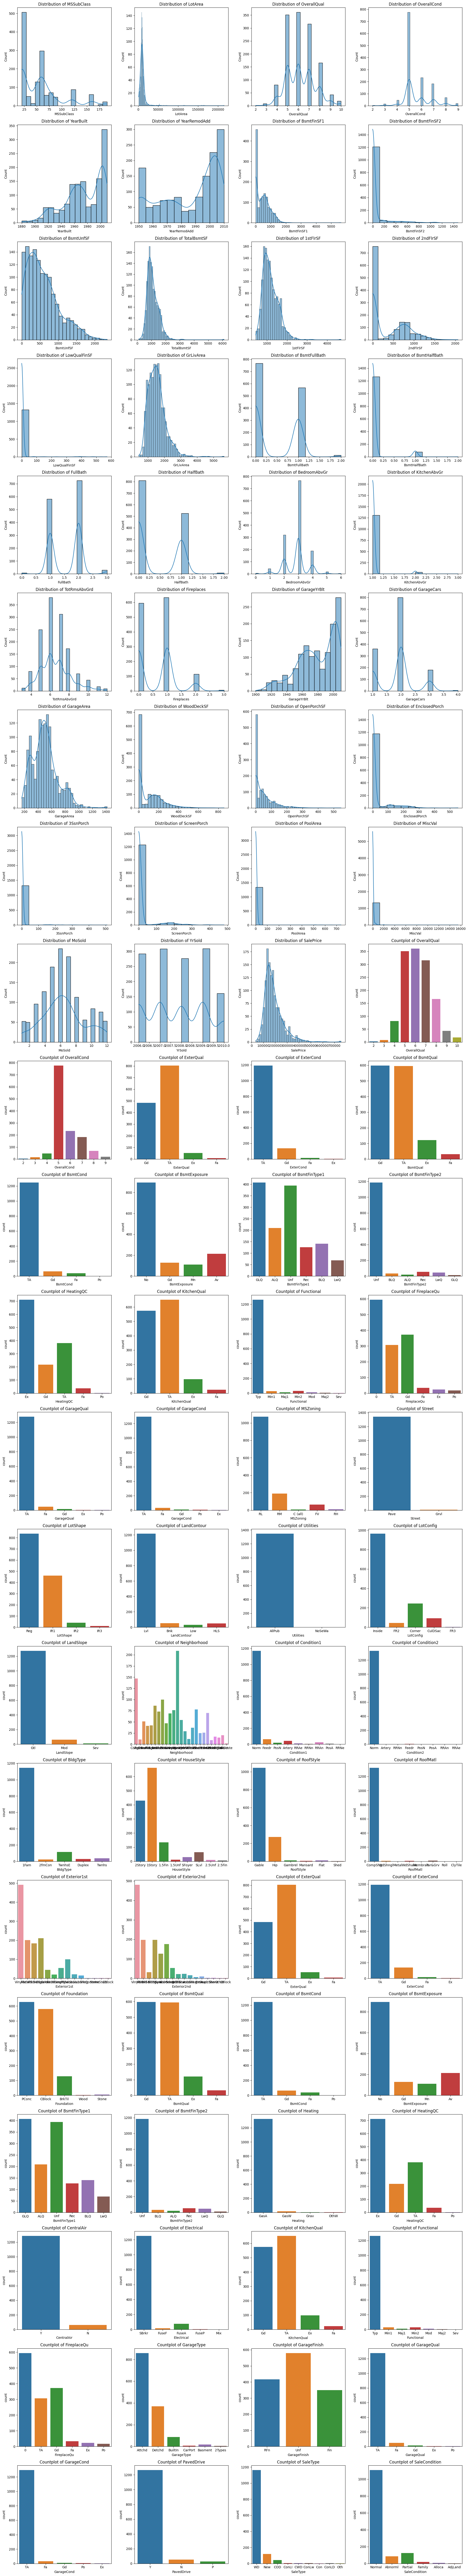

In [ ]:

numerical_cols = df.select_dtypes(include=['number']).columns
ordinal_cols = [ # List your ordinal columns here
    'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
    'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond'
]
categorical_cols = df.select_dtypes(include=['object']).columns

# Set up the figure
num_plots = len(numerical_cols) + len(ordinal_cols) + len(categorical_cols)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot numerical variables
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Plot ordinal variables
start_idx = len(numerical_cols)
for i, col in enumerate(ordinal_cols):
    sns.countplot(x=df[col], ax=axes[start_idx + i])
    axes[start_idx + i].set_title(f'Countplot of {col}')

# Plot categorical variables
start_idx = len(numerical_cols) + len(ordinal_cols)
for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[start_idx + i])
    axes[start_idx + i].set_title(f'Countplot of {col}')

# Remove any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


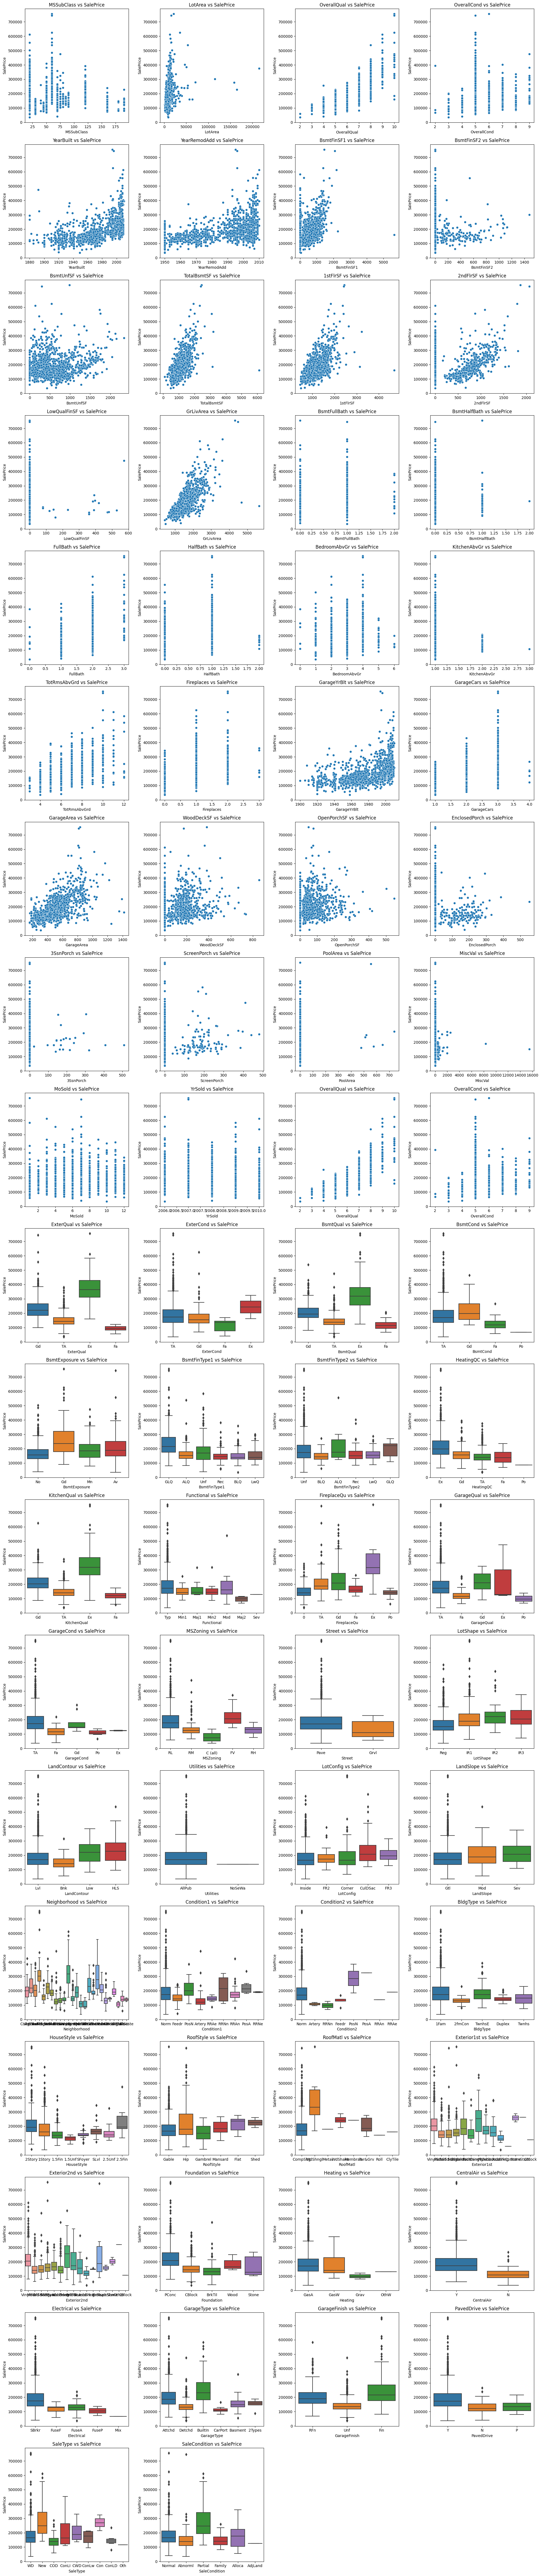

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
ordinal_cols = [
    'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
    'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond'
]
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [x for x in categorical_cols if x not in ordinal_cols]
# Assuming 'SalePrice' is the target variable
target_var = 'SalePrice'

# Combine all columns excluding the target variable
all_vars = [col for col in (numerical_cols + ordinal_cols + categorical_cols) if col != target_var]

# Set up the figure
num_plots = len(all_vars)
rows = (num_plots + 3) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))
axes = axes.flatten()

# Plot each variable against SalePrice
for i, var in enumerate(all_vars):
    if var in numerical_cols:
        sns.scatterplot(x=var, y=target_var, data=df, ax=axes[i])
    elif var in ordinal_cols:
        sns.boxplot(x=var, y=target_var, data=df, ax=axes[i])
    elif var in categorical_cols:
        sns.boxplot(x=var, y=target_var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs {target_var}')

# Remove any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Graphical Analysis

Looking at the graphs, it is apparent that some variables have excellent correation with SalePrice, while the others' correlations are more nebulous. Also, some variables are evenly distribnuted amongst their categories, while others are skewed heavily towards one value.


### Numerical

Most share pretty good correlation. There are some numerical values that are heavily skewed towards zero, such as PoolArea, simply because they do not have a pool in the first place. Eliminating these will come on the account of whether they are skewed in distribution rather than on basis of correlation


### Categorical

Upon plotting some boxplots, the large amount of data points that are outside of the IQR, or outliers, make the graphical analysis pretty moot based on any form of correlation, and we will just have to resort to removing variables based on distribution first.


### Variables to be removed, on account of bad distribution

Upon plotting some countplots, it appears that some variables have an exceedingly large amoun tof data points belonging to a single value, which will cause the variable to biased and only add more dimensions and error if left to remain, as such, they will be removed

BsmtFinSF2
KitchenAbvGr
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
BsmtFinType2
Functional
Street
GarageCond
GarageQual
LandContour
Utilities
Condition2
Condition1
RoofMatl
BsmtCond
Heating


In [ ]:
To_be_removed =  [
    'BsmtFinSF2', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
    'PoolArea', 'MiscVal', 'BsmtFinType2', 'Functional', 'Street', 'GarageCond',
    'GarageQual', 'LandContour', 'Utilities', 'Condition2', 'Condition1',
    'RoofMatl', 'BsmtCond', 'Heating'
]


## Data Preparation

- After missing values and noisy/incomplete features have been dropped, the next course of action is to prepare the data for regression by encoding categorical variables  
- Based on contextual knowledge from data_description.txt, we should be able to infer which categorical values are ordinal and which ones are nominal, based on the set of values fore each category.
- While this can be done manually, it would take a long time to separate the variables into these 2 groups, let alone assign rankings for each value for each category
- As such, I fed data_description.txt into ChatGPT to sort the categories into these 2 categories, and create dictionary mappings for the ordinal categorical variables

In [ ]:
df.drop(To_be_removed, axis = 1)

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Inside,Gtl,CollgCr,1Fam,2Story,7,...,2,548,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,FR2,Gtl,Veenker,1Fam,1Story,6,...,2,460,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,11250,IR1,Inside,Gtl,CollgCr,1Fam,2Story,7,...,2,608,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,9550,IR1,Corner,Gtl,Crawfor,1Fam,2Story,7,...,3,642,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,14260,IR1,FR2,Gtl,NoRidge,1Fam,2Story,8,...,3,836,Y,192,84,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Reg,Inside,Gtl,Gilbert,1Fam,2Story,6,...,2,460,Y,0,40,8,2007,WD,Normal,175000
1456,20,RL,13175,Reg,Inside,Gtl,NWAmes,1Fam,1Story,6,...,2,500,Y,349,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Reg,Inside,Gtl,Crawfor,1Fam,2Story,7,...,1,252,Y,0,60,5,2010,WD,Normal,266500
1458,20,RL,9717,Reg,Inside,Gtl,NAmes,1Fam,1Story,5,...,1,240,Y,366,0,4,2010,WD,Normal,142125


In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorc

In [ ]:

# Define the mappings
ordinal_mappings = {
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},

}

# Apply the mappings to the DataFrame
for column, mapping in ordinal_mappings.items():
    df[column] = df[column].map(mapping)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   MSZoning       1346 non-null   object 
 2   LotArea        1346 non-null   int64  
 3   Street         1346 non-null   object 
 4   LotShape       1346 non-null   object 
 5   LandContour    1346 non-null   object 
 6   Utilities      1346 non-null   object 
 7   LotConfig      1346 non-null   object 
 8   LandSlope      1346 non-null   object 
 9   Neighborhood   1346 non-null   object 
 10  Condition1     1346 non-null   object 
 11  Condition2     1346 non-null   object 
 12  BldgType       1346 non-null   object 
 13  HouseStyle     1346 non-null   object 
 14  OverallQual    1346 non-null   int64  
 15  OverallCond    1346 non-null   int64  
 16  YearBuilt      1346 non-null   int64  
 17  YearRemodAdd   1346 non-null   int64  
 18  RoofStyle    

In [ ]:
df['FireplaceQu'].fillna(value = 0, inplace=True)

/tmp/ipykernel_33/948353026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna(value = 0, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   MSZoning       1346 non-null   object 
 2   LotArea        1346 non-null   int64  
 3   Street         1346 non-null   object 
 4   LotShape       1346 non-null   object 
 5   LandContour    1346 non-null   object 
 6   Utilities      1346 non-null   object 
 7   LotConfig      1346 non-null   object 
 8   LandSlope      1346 non-null   object 
 9   Neighborhood   1346 non-null   object 
 10  Condition1     1346 non-null   object 
 11  Condition2     1346 non-null   object 
 12  BldgType       1346 non-null   object 
 13  HouseStyle     1346 non-null   object 
 14  OverallQual    1346 non-null   int64  
 15  OverallCond    1346 non-null   int64  
 16  YearBuilt      1346 non-null   int64  
 17  YearRemodAdd   1346 non-null   int64  
 18  RoofStyle    

In [ ]:
# One-hot encoding the nominal categorical values

nominal_categorical_columns = df.select_dtypes(include=['object']).columns


df = pd.get_dummies(df, columns=nominal_categorical_columns, drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Columns: 207 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(164), float64(2), int64(41)
memory usage: 678.3 KB


In [ ]:
df.isnull().any().any()

False

In [ ]:
df.map(pd.api.types.is_numeric_dtype).all().all()

False

In [ ]:
#df.to_csv('encodeddf.csv')

# Processing data for Regression

In [ ]:

from sklearn.model_selection import train_test_split


# Sample DataFrame with one-hot encoded variables


# Prepare the feature matrix and target vector
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling feature matrices

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Models and Metrics


### Models
From the general appearance of the previous plots of numeric features, the Sale Price of houses appeared to generally increase with an increase in the values of the features.

With this foreknowledge, I think I can resort to using parametric methods, such as Linear Regression, polynomial regression and logistic regression. Howevber, due to the incredibly large number of values, and the inability to eliminate a lot of features earlier from graphical analysis because I was unsure of their actual correlation, I do suspect some features may not be as well correlated, and can just end up introducing more noise to the dataset. Thus, I will also be including regularisation to suppress noise from weakly-correlated values, in the form of Lasso and Ridge regression

### Metrics

This is a regression problem, I think it is reasonable to use mse error and r-squared to evaluate model performance

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_linear = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.713834658808013e+25
R^2 Score: -7517160262650844.0


In [ ]:
y_pred_linear.max()

1848735702533.5513

### Evaluation of Linear Regression

As can be seen from the incredibnly high mean squared error and R^2 score, as well as the maximum value in y_pred_linear, the model is overfitting heavily, as forecasted earlier.

As such, we will try again using regularisation

### Lasso Regression (L1 regularisation)

- Since lasso regression has the additional parameter alpha to control the amount of regularisation, will use GridSearchCV to try multiple values for hyperparams alpha and maximum iterations to find the best lasso model.

I have decided to use GridSearchCV as

- Allow for finetuning alpha/strength of regularisation by trying multiple values (looking within a larger range of large values since we expect to require heavy regularisation given the large amount of noise from the large number of variables)

- Allow for finetuning max iterations by trying multiple values (consider a range starting from 600, smaller than the default 1000 for lasso)

- Allow for using cross-validation during hyperparameter tuning, which means the tuned model will generalise better to unseen data/reduce overfitting, allowing for better performance on the holdout validation set(Y_test). Holdout validation will allow us to tune hyperparameters to train a model that will generalise better and have better performance on unseen data or a test set, rather than training for best performance on the validation set


In [ ]:
from sklearn.model_selection import GridSearchCV


alpha_values = np.logspace(2, 5, 50)

# Create a parameter grid
param_grid = {'alpha': alpha_values, 'max_iter': range(600,1000,100)}


lasso_cv = GridSearchCV(Lasso(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting gridsearch cv
lasso_cv.fit(X_train_scaled, y_train)

# Tuned hyperparams
best_alpha = lasso_cv.best_params_['alpha']
best_max_iter = lasso_cv.best_params_['max_iter']
print("Best alpha value:", best_alpha)
print("Best max_iter value:", best_max_iter)

# Fit the best model
lasso_best = Lasso(alpha=best_alpha, max_iter=best_max_iter)
lasso_best.fit(X_train_scaled, y_train)
y_pred_bestlasso = lasso_best.predict(X_test_scaled)

# Evaluation
mse_best = mean_squared_error(y_test, y_pred_bestlasso)
r2_best = r2_score(y_test, y_pred_bestlasso)
print("Mean Squared Error (best lasso):", mse_best)
print("R^2 Score (best lasso):", r2_best)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.261e+09, tolerance: 5.828e+08
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.686e+09, tolerance: 5.706e+08
  model = cd_fast.enet_coordinate_descent(


Best alpha value: 1456.3484775012444
Best max_iter value: 600
Mean Squared Error (best lasso): 1064580037.8148553
R^2 Score (best lasso): 0.7845187120085289


In [ ]:
coefficients = lasso_best.coef_
feature_names = X.columns


coeff_df = pd.DataFrame({'Feature': feature_names,'Coefficient': abs(coefficients)})

In [ ]:
coeff_df.sort_values(by='Coefficient', ignore_index = True ,ascending = False).iloc[0:50, :]

,Feature,Coefficient
0,GrLivArea,28429.497520
1,OverallQual,15242.446594
2,MSSubClass,7276.190458
3,BsmtQual,7104.574524
4,BsmtExposure,7054.144760
5,Neighborhood_NridgHt,6926.394642
6,GarageCars,6733.902641
7,KitchenQual,6106.512329
8,Neighborhood_NoRidge,5956.453410
9,RoofMatl_WdShngl,5470.061365


### Evaluation of Lasso Regression

- Pretty good performance as there is a high level of correlation with our predictions and the given labels (R2 score of 0.78, which is pretty high)

- Seeing the success of regularisation compared with Linear Regression, will likely be using regularisation for Polynomial Regression (likely stick with relatively inflexible 2nd and 3rd degree polynomials to prevent overfitting)


### Ridge Regression (L2 Regularisation)

- given the success of Lasso regression,

In [ ]:
# Testing a range of large alphas
alpha_values = np.logspace(2, 5, 50)

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alpha_values, 'max_iter': range(600, 1000, 100)}

# Initialize GridSearchCV with Ridge regression, 5-fold cross validation, scoring by neg mse so that model will try to minimise the absolute mse
ridge_cv = GridSearchCV(Ridge(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting GridSearchCV
ridge_cv.fit(X_train_scaled, y_train)

# Retrieve the best parameters
best_alpha = ridge_cv.best_params_['alpha']
best_max_iter = ridge_cv.best_params_['max_iter']
print("Best alpha value:", best_alpha)
print("Best max_iter value:", best_max_iter)

# Fit the best Ridge model
ridge_best = Ridge(alpha=best_alpha, max_iter=best_max_iter)
ridge_best.fit(X_train_scaled, y_train)
y_pred_bestridge = ridge_best.predict(X_test_scaled)

# Evaluation
mse_best = mean_squared_error(y_test, y_pred_bestridge)
r2_best = r2_score(y_test, y_pred_bestridge)
print("Mean Squared Error (best ridge):", mse_best)
print("R^2 Score (best ridge):", r2_best)

Best alpha value: 471.48663634573944
Best max_iter value: 600
Mean Squared Error (best ridge): 978347084.0471406
R^2 Score (best ridge): 0.801973095225517


## Evaluation of Ridge Regression

- Ridge regression has performed marginally better than Lasso regression, with an R2 value of 0.80. May be attributed to Ridge being better at Lasso at dealing with heavily intercorrelated features, where Lasso might pick one and eliminate the rest, however, again empirical testing is the best solution.



In [ ]:
# To use pipeline for quadratic polynomia
from sklearn.pipeline import Pipeline

### Ridge Polynomial (Degree 2/ Quadratic)

In [ ]:

# Assuming your data has already been scaled:
# X_train_scaled, X_test_scaled, y_train, y_test

# Define the pipeline with PolynomialFeatures and Ridge regression
pipeline_ridge = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge())
])

# Define the parameter grid for GridSearchCV
param_grid_ridge = {
    'ridge__alpha': np.logspace(1, 4, 50),
    'ridge__max_iter': range(600, 1000, 100)
}

# Initialize GridSearchCV with Ridge regression
ridge_cv = GridSearchCV(pipeline_ridge, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# Fitting GridSearchCV
ridge_cv.fit(X_train_scaled, y_train)

# Retrieve the best parameters
best_alpha_polyridge = ridge_cv.best_params_['ridge__alpha']
best_max_iter_polyridge = ridge_cv.best_params_['ridge__max_iter']
print("Best alpha for Ridge:", best_alpha_polyridge)
print("Best max_iter for Ridge:", best_max_iter_polyridge)

# Fit the best Ridge model using the best parameters found
ridge_best = Ridge(alpha=best_alpha_polyridge, max_iter=best_max_iter_polyridge)
ridge_best.fit(X_train_scaled, y_train)
y_pred_bestpolyridge = ridge_best.predict(X_test_scaled)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_bestpolyridge)
r2_ridge = r2_score(y_test, y_pred_bestpolyridge)
print("Mean Squared Error (Ridge):", mse_ridge)
print("R^2 Score (Ridge):", r2_ridge)


Best alpha for Ridge: 3727.593720314938
Best max_iter for Ridge: 600
Mean Squared Error (Ridge): 1104167752.9705584
R^2 Score (Ridge): 0.7765057758765497


### Evaluation of Ridge Quadratic

The R^2 value for Ridge Polynomial is slightly lower than Lasso and Ridge at 0.77, so there isnt any meaningful increase in performance. Without a significant difference, probably not worth pursuing Lasso, or more flexible models like 3rd degree polynomial models and onwards.



## Conclusion

It appears that the best model to predict house prices, out of the 4 models tried, is Ridge Regression, with an R2 score of 0.80, although Lasso Regression was not far off

In the future, still seeing the need for heavy regularisation, performance could potentially be improved by striking a balance both L1 and L2 regularisation, using ElasticNet. Furthermore, with the best alpha parameter and best max iteration values picked from a large range of values fed, we can try using a much smaller range closer to our current alpha parameter and max iteration value to converge closer to the "true" ideal alpha and max iteration values.